# Programowanie w Jƒôzykach Skryptowych (Laboratorium 3)

### Przesy≈Çanie zada≈Ñ

Wszystkie pliki nale≈ºy spakowaƒá archiwizatorem **zip** i przes≈Çaƒá za po≈õrednictwem platformy WIKAMP. Poni≈ºej oczekiwana zawarto≈õƒá archiwum (zamie≈Ñ zmienne `imie` oraz `nazwisko` na odpowiednie warto≈õci):

```
+-- üìÇ [imie].[naziwsko].zip
    +-- üìú Laboratorium 3 - programowanie obiektowe.ipynb
    +-- üìú [wszelkie dodatkowe pliki]
```


### Zadanie 1

Grafy w komputerze reprezentujemy najczƒô≈õciej przy pomocy list sƒÖsiedztwa. Utw√≥rz odpowiednie klasy do reprezentacji grafu oraz realizacji algorytmu BFS.

Poni≈ºszy obrazek (czƒô≈õƒá z prawej strony) pokazuje takƒÖ reprezentacjƒô (w g√≥rnej czƒô≈õci - graf nieskierowany, w dolnej czƒô≈õci - graf skierowany).
Mo≈ºesz skorzystaƒá z wyk≈Çadu z algorytm√≥w i struktur danych  https://youtu.be/L4D3fo5qAAY

<div style='border: 1px dashed; width: 50%; margin: auto; margin-top: 10px;'>
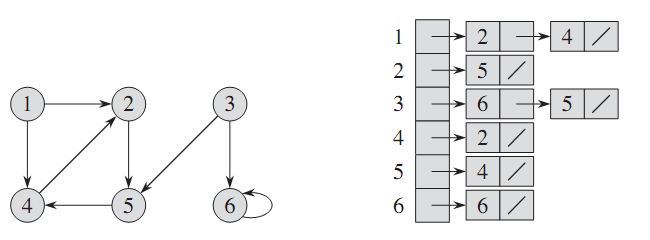

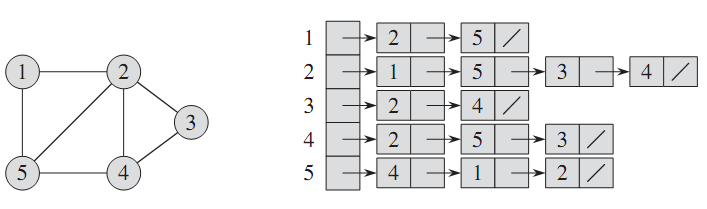
    
</div>



In [121]:
import networkx as nx
import matplotlib.pyplot as plt

class Vertex:
    def __init__(self, name, edges):
        self.name = name
        self.edges = edges
        self.color = 'white'
    def __eq__(self, other):
        return self.name == other.name
    def __contains__(self, vertex):
        return vertex.name in self.edges
    def __str__(self):
        color = f' color {self.color}' if hasattr(self, 'color') else ''
        distance = f' distance {self.distance}' if hasattr(self, 'distance') else ''
        return f'vertex \'{self.name}\' with edges {self.edges}{color}{distance}'

class Graph:
    def __init__(self, vertices):
        self.vertices = vertices
    def __getitem__(self, name):
        for vertex in self.vertices:
            if vertex.name == name:
                return vertex
        raise KeyError(f'vertex \'{name}\' not found')
    def draw(self):
        graph_network = nx.Graph()
        nodes = {'white': [], 'gray': [], 'black': []}
        [nodes[vertex.color].append(vertex.name) for vertex in self.vertices]
        black_nodes = [node for node in [node for nodes_sublist in list(nodes.values()) for node in nodes_sublist] if node not in nodes['black']]
        edges = [(vertex.name, edge) for vertex in self.vertices for edge in vertex.edges]
        graph_network.add_nodes_from([node for nodes_sublist in list(nodes.values()) for node in nodes_sublist])
        graph_network.add_edges_from(edges)
        position = nx.kamada_kawai_layout(graph_network)
        nx.draw_networkx_labels(graph_network, position, labels={node: node for node in black_nodes})
        nx.draw_networkx_labels(graph_network, position, labels={node: node for node in nodes['black']}, font_color='white')
        options = {'edgecolors': 'black', 'node_size': 600}
        nx.draw_networkx_nodes(graph_network, position, nodelist=nodes['white'], node_color='white', **options)
        nx.draw_networkx_nodes(graph_network, position, nodelist=nodes['gray'], node_color='gray', **options)
        nx.draw_networkx_nodes(graph_network, position, nodelist=nodes['black'], node_color='black', **options)
        nx.draw_networkx_edges(graph_network, position)
        plt.tight_layout()
        plt.axis('off')
        plt.show()

graph = Graph([
    Vertex('v', ['r']),
    Vertex('r', ['v', 's']),
    Vertex('s', ['r', 'w']),
    Vertex('w', ['s', 't', 'x']),
    Vertex('t', ['w', 'u', 'x']),
    Vertex('x', ['w', 't', 'u', 'y']),
    Vertex('u', ['t', 'x', 'y']),
    Vertex('y', ['u', 'x'])
])

### Zadanie 2
Algorytm przechodzenia grafu wszerz (ang. *breadth-first search*, BFS) wychodzi od pewnego wskazanego wierzcho≈Çka (tzw. ≈∫r√≥d≈Ça, ang. *source*) grafu i stopniowo osiƒÖga wszystkie inne osiƒÖgalne ze ≈∫r√≥d≈Ça wierzcho≈Çki, w kolejno≈õci: najpierw najbli≈ºsi sƒÖsiedzi (tj. w odleg≈Ço≈õci 1), potem ci w odleg≈Ço≈õci 2, itd. 

Zwr√≥ƒá uwagƒô na to, ≈ºe pole _‚Äûkolor‚Äù_ wierzcho≈Çka grafu jest u≈ºywane tylko w algorytmie BFS i jako takie nie powinno byƒá sk≈ÇadowƒÖ (atrybutem) wierzcho≈Çka. Niech zatem to pole bƒôdzie dodawane i usuwane dynamicznie, w czasie dzia≈Çania algorytmu (tj. dodawane na poczƒÖtku, usuwane na ko≈Ñcu).
Jako kolejkƒô mo≈ºna wykorzystaƒá klasƒô `deque` z modu≈Çu `collections` (jest to, dok≈Çadniej m√≥wiƒÖc, kolejka dwustronna, ang. *doubly-ended queue*).

<u>Pseudokod algorytmu:</u>
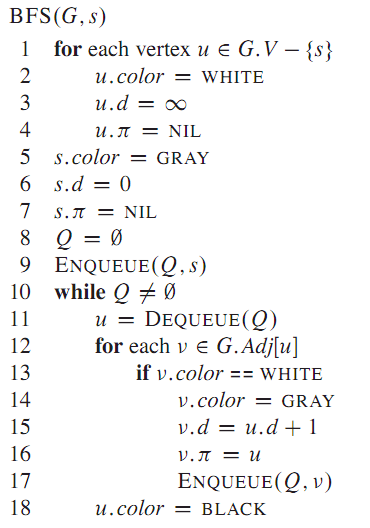



gdzie, 

- `G.V` - zbior wierzcholkow,
- `G.E` - zbior krawƒôdzi,
- `Adj` - `|V|` list, po jednej dla ka≈ºdego wierzcho≈Çka z `V`
- `Adj[u]` - lista wszystkich wierzcho≈Çk√≥w `v` do kt√≥rych da siƒô przej≈õƒá z wierzcho≈Çka `u`, 
- `s` - wierzcho≈Çek poczƒÖtkowy,
- `u.color` - kolor wierzcho≈Çka,
- `u.PI` - poprzednik `u` (wczesniej odwiedzony wierzcho≈Çek),
-  `u.d` - odleg≈Ço≈õƒá `u` od wierzcho≈Çka poczƒÖtkowego `s`,
- `Q` - kolejka typu FIFO, w kt√≥rej pamiƒôta siƒô szare wierzcho≈Çki,
- `ENQUEUE` - wstaw do kolejki,
-  `DEQUEUE` - usun z kolejki.








<u>Przyk≈Çad dzia≈Çania:</u>

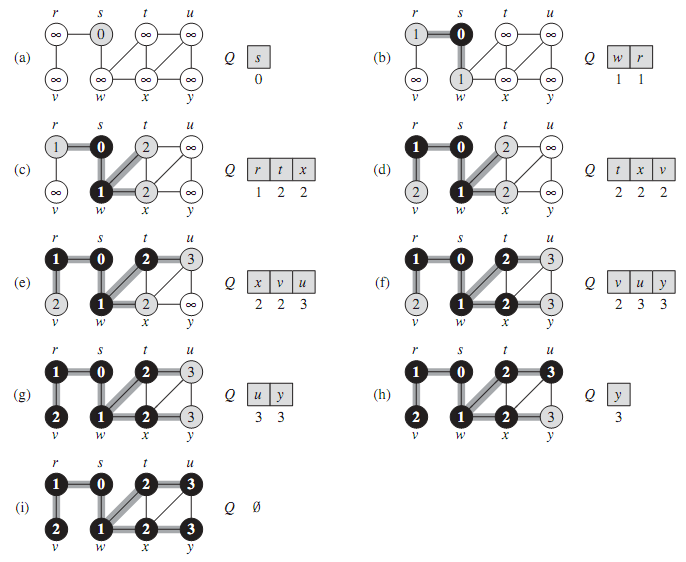

In [122]:
import math
from collections import deque

def BFS(graph, start):
    for vertex in graph.vertices:
        if (vertex == start):
            continue
        vertex.color = 'white'
        vertex.distance = math.inf
        vertex.parent = None
    start.color = 'gray'
    start.distance = 0
    start.parent = None
    queue = deque([start])
    graph.draw()
    while len(queue) > 0:
        vertex = queue.popleft()
        for vertex_name in vertex.edges:
            _vertex = graph[vertex_name]
            if _vertex.color == 'white':
                _vertex.color = 'gray'
                _vertex.distance = vertex.distance + 1
                _vertex.parent = vertex
                queue.append(_vertex)
        vertex.color = 'black'
        graph.draw()

### Zadanie 3

Przedstaw graficznie za pomocƒÖ biblioteki networkx (https://networkx.github.io/) kroki dzia≈Çania algorytmu BFS (malowanie wierzcho≈Çk√≥w).

Instalacja: `pip install networkx` lub `conda install networkx`.

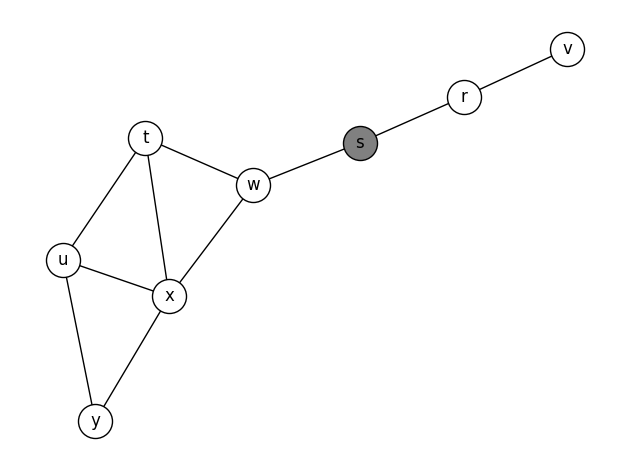

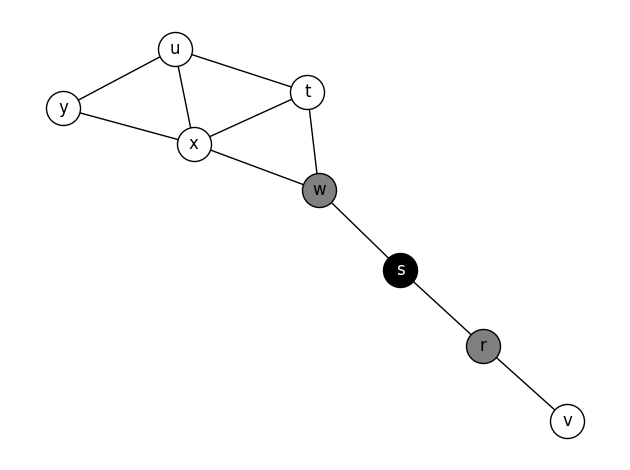

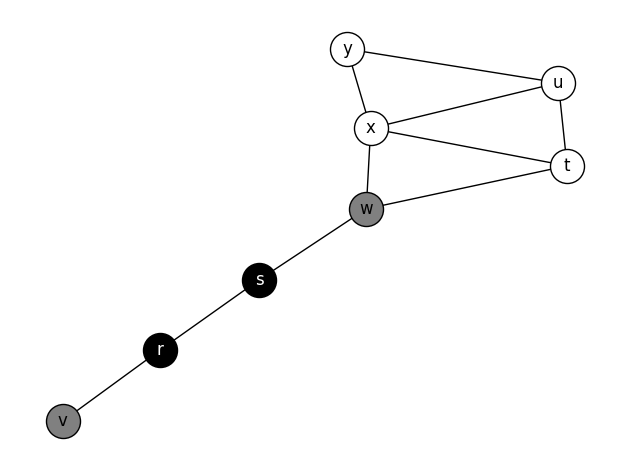

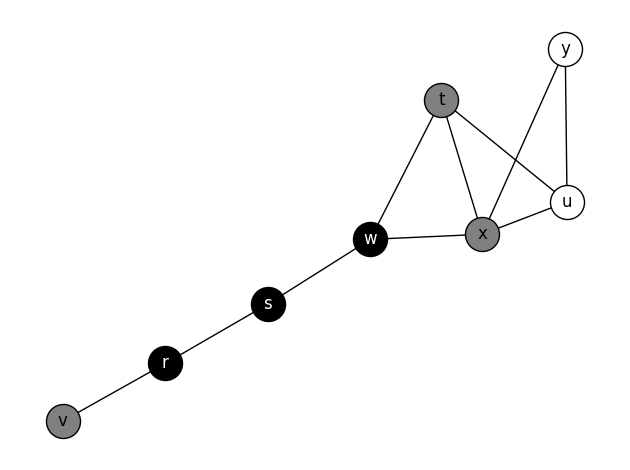

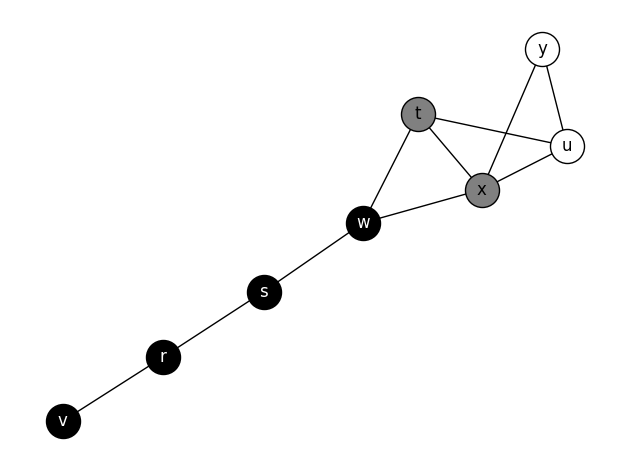

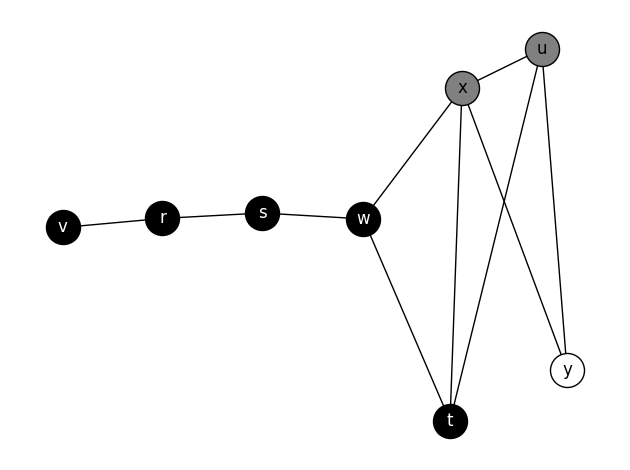

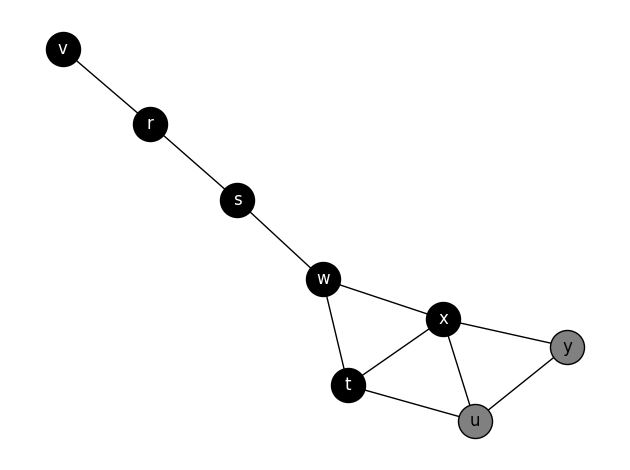

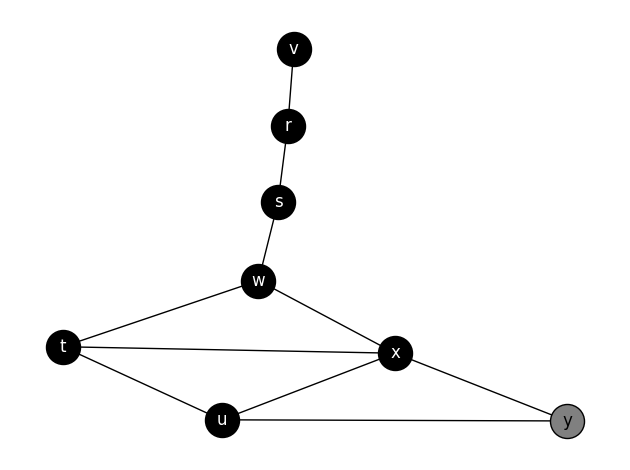

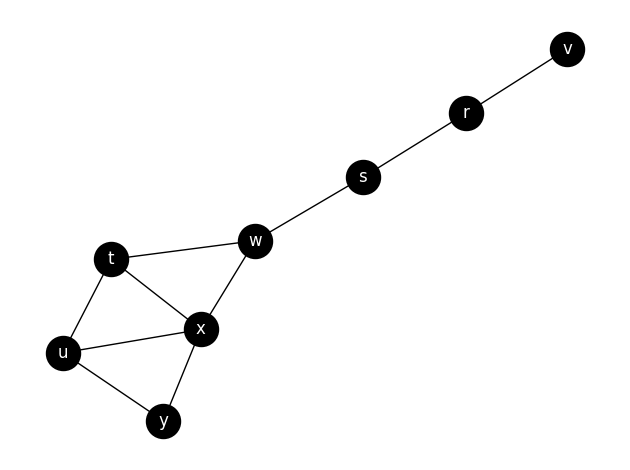

In [123]:
BFS(graph, graph['s'])

### Zadanie 4
Napisz i wykonaj kilka test√≥w jednostkowych (`import unittest`; dokumentacja: 
https://docs.python.org/3/library/unittest.html)

In [124]:
import unittest

def one_sentence_with_stars(s):
    return s.replace(' ', '*')

def two_sentence_with_stars2(s):
    return ' '.join(s.split()).replace(' ', '*')

def four_count_unique_digits(n):
    return len(set(int(digit) for digit in str(n)))

class TestLab2Methods(unittest.TestCase):
    def test_one_sentence_with_stars(self):
        self.assertEqual(one_sentence_with_stars('Sentence_with_underscores'), 'Sentence_with_underscores')
        self.assertEqual(one_sentence_with_stars('A  normal sentence.'), 'A**normal*sentence.')
        with self.assertRaises(AttributeError):
            one_sentence_with_stars(123)
    
    def test_two_sentence_with_stars2(self):
        self.assertEqual(two_sentence_with_stars2('Sentence_with_underscores'), 'Sentence_with_underscores')
        self.assertEqual(two_sentence_with_stars2('A        normal sentence.'), 'A*normal*sentence.')
        with self.assertRaises(AttributeError):
            two_sentence_with_stars2(123)

    def test_four_count_unique_digits(self):
        self.assertEqual(four_count_unique_digits(123), 3)
        self.assertEqual(four_count_unique_digits(123123123), 3)
        self.assertEqual(four_count_unique_digits(111111122222), 2)
        with self.assertRaises(ValueError):
            four_count_unique_digits('abc')

# >>>> TUTAJ DROBNA ZMIANA W STOSUNKU DO DOKUMENTACJI (dla notebooka)
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

........
----------------------------------------------------------------------
Ran 8 tests in 0.005s

OK


### Zadanie 5

Dana jest kwadratowa plansza o boku SIZE (np. 4) dla znanej gry 2048 (https://2048game.com/pl/). Ka≈ºdy wiersz zawiera od 0 do 4 liczb. Nale≈ºy, z wykorzystaniem konstrukcji Numpy, zasymulowaƒá ruch w lewo, w prawo, w g√≥rƒô i w d√≥≈Ç planszy zgodnie z regu≈Çami gry (ale BEZ dodawania nowego kafelka w losowym miejscu). Innymi s≈Çowy, trzeba napisaƒá cztery funkcje: `move_left(...)`, `move_right(...)`, `move_up(...)`, `move_down(...)`. Przyk≈Çad ruchu w prawo:

Wej≈õciem i wyj≈õciem ka≈ºdej z obu funkcji jest 2-wymiarowa tablica Numpy.

> UWAGA: postaraj siƒô napisaƒá ‚Äûkonkretny kod‚Äù tylko do jednej z tych funkcji, a pozosta≈Çe trzy niech siƒô do niej w sprytny spos√≥b odwo≈ÇujƒÖ.


In [26]:
import numpy as np

board = np.array([[4, 4, 4, 4],
                  [4, 4, 4, 4],
                  [4, 0, 0, 4],
                  [4, 4, 4, 4]])

def squish(board):
    for column in range(board.shape[1]):
        for row in range(board.shape[0] - 1, 0, -1):
            if (board[row][column] == board[row - 1][column]):
                board[row][column] += board[row - 1][column]
                board[row - 1][column] = 0

def gravity(board):
    for column in range(board.shape[1]):
        for row in range(board.shape[0] - 1, -1, -1):
            if (board[row][column] != 0):
                for bottom in range(row, board.shape[0]):
                    if (board[bottom][column] == 0):
                        board[bottom][column] = board[bottom - 1][column]
                        board[bottom - 1][column] = 0

def move_down(board):
    new_board = np.copy(board)
    gravity(new_board)
    squish(new_board)
    gravity(new_board)
    return new_board

def move_up(board):
    new_board = np.copy(board)
    new_board = np.flip(new_board, 0)
    new_board = move_down(new_board)
    new_board = np.flip(new_board, 0)
    return new_board

def move_left(board):
    new_board = np.copy(board)
    new_board = np.rot90(new_board)
    new_board = move_down(new_board)
    new_board = np.rot90(new_board, 3)
    return new_board

def move_right(board):
    new_board = np.copy(board)
    new_board = np.rot90(new_board, 3)
    new_board = move_down(new_board)
    new_board = np.rot90(new_board)
    return new_board

print(board)
print()
print('move down')
print()
board = move_left(board)
print(board)
print()
print('move right')
print()
board = move_right(board)
print(board)
print()
print('move up')
print()
board = move_up(board)
print(board)
print()
print('move left')
print()
board = move_left(board)
print(board)

[[4 4 4 4]
 [4 4 4 4]
 [4 0 0 4]
 [4 4 4 4]]

move down

[[8 8 0 0]
 [8 8 0 0]
 [8 0 0 0]
 [8 8 0 0]]


### Zadanie 6

* Zaimplementuj dekorator o nazwie nonNone, kt√≥ry sprawdza czy parametry udekorowanej nim funkcji nie zawierajƒÖ warto≈õci `None` ‚Äì je≈õli tak, to rzuƒá wyjƒÖtek.

* Dekorator ten powinien posiadaƒá parametr o nazwie `positions`, kt√≥ry ma byƒá typu `Iterable` i zawieraƒá indeksy argument√≥w dekorowanej funkcji, kt√≥re podlegajƒÖ sprawdzeniu (pod kƒÖtem `None`).
Czyli je≈õli np. przeka≈ºemy `positions = []`, to **≈ºaden** parametr dekorowanej funkcji nie zostanie sprawdzony. Je≈õli `positions = (2, 1)`, to tylko parametry trzeci i drugi zostanƒÖ sprawdzone. Itp.
Wreszcie, je≈õli u≈ºyjemy dekoratora w ten spos√≥b: `@nonNone()`, wtedy wszystkie parametry dekorowanej funkcji majƒÖ zostaƒá sprawdzone.

* Napisz piƒôƒá test√≥w jednostkowych (dla przypadk√≥w poprawnych lub takich,
kt√≥re rzucajƒÖ wyjƒÖtek).

> O dekoratorach z parametrami:
https://stackoverflow.com/questions/5929107/decorators-with-parameters

In [126]:
def nonNone(argument = None):
    def decorator(function):
        def wrapper(*args, **kwargs):
            for index, arg in enumerate(args):
                if ((argument is None or index in argument) and arg is None):
                    raise ValueError(f'argument {index} is None')
            return function(*args, **kwargs)
        return wrapper
    return decorator

@nonNone()
def function_one(argument_one, argument_two):
    pass

@nonNone((1, 2))
def function_two(argument_one, argument_two, argument_three):
    pass

@nonNone([0])
def function_three(argument_one):
    pass

class TestMethods(unittest.TestCase):
    def test_function_one_pass(self):
        function_one(1, 2)
        pass

    def test_function_one_fail(self):
        with self.assertRaises(ValueError):
            function_one(1, None)
    
    def test_function_two_pass(self):
        function_two(None, 2, 3)
        pass

    def test_function_two_fail(self):
        with self.assertRaises(ValueError):
            function_two(1, None, 3)

    def test_function_three_pass(self):
        function_three(0)
        pass

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

........
----------------------------------------------------------------------
Ran 8 tests in 0.004s

OK
